In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df = pd.read_csv('mega_df4.csv')
df = df.sort_values(by='Number of Elements')


In [68]:
def slice_df(df, conditions):
    """
    Slice a DataFrame based on conditions for each column.

    Parameters:
    df (pd.DataFrame): The DataFrame to slice.
    conditions (dict): A dictionary where keys are column names and values are conditions in string form.

    Returns:
    pd.DataFrame: The sliced DataFrame.
    """
    # Create a query string from conditions
    query_str = ' & '.join([f'`{col}` {cond}' for col, cond in conditions.items()])

    # Use df.query() to filter the DataFrame
    return df.query(query_str)


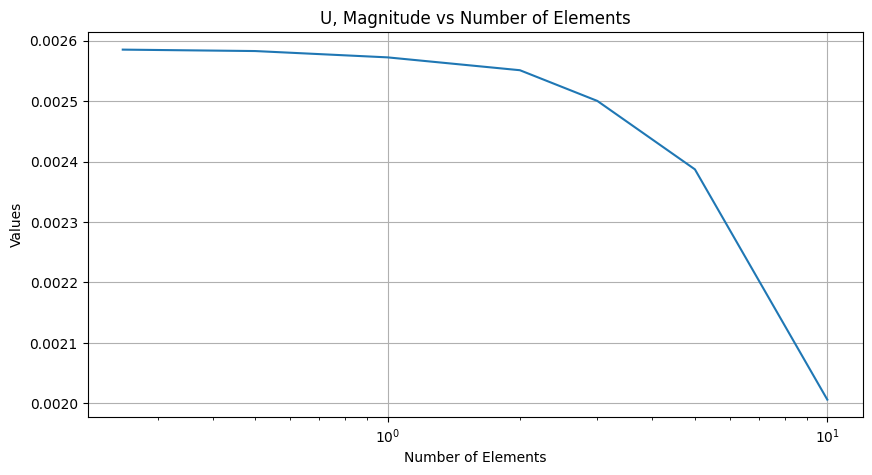

In [69]:
measurement = 'U, Magnitude'
node = 'A'
element = 'tri'
interpolation = 'lin'


conditions = {
    'Measurement Type': f'== "{measurement}"',
    'Node ID': f'== "{node}"',
    'Element Type': f'== "{element}"',
    'Interpolation Type': f'== "{interpolation}"'
}
sliced_df = slice_df(df, conditions)

fig = plt.subplots(figsize=(10, 5))
plt.plot(sliced_df['Element Size'],sliced_df['Values'])
plt.plot(np.diff(sliced_df['Element Size']),sliced_df['Values'][1:])
plt.xscale('log')
plt.title(f'{measurement} vs Number of Elements')
plt.xlabel('Number of Elements')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [70]:
def get_plot_data(measurement='S, Mises', node='A', element='tri', interpolation='lin'):
    conditions = {
        'Measurement Type': f'== "{measurement}"',
        'Node ID': f'== "{node}"',
        'Element Type': f'== "{element}"',
        'Interpolation Type': f'== "{interpolation}"'
    }
    sliced_df = slice_df(df, conditions)
    return sliced_df

In [71]:
def plot_parameters(ax, measurement='S, Mises', node='A', element='tri', interpolation='lin'):
    data = get_plot_data(measurement, node, element, interpolation)
    ax.plot(data['Number of Elements'], data['Values'], label=f'Element Type: {element}, \nInterpolation Type: {interpolation}')
    plt.title(f'{measurement} vs Number of Elements')
    plt.ylabel(f'{measurement}')

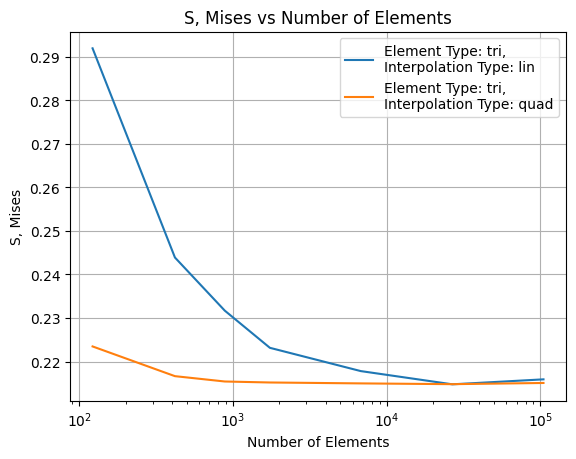

In [72]:
fig, ax = plt.subplots()
plt.xscale('log')
plt.xlabel('Number of Elements')
plt.grid(True)
plot_parameters(ax, measurement='S, Mises', node='A', element='tri', interpolation='lin')

plot_parameters(ax, measurement='S, Mises', node='A', element='tri', interpolation='quad')

plt.legend()


In [81]:
element_types = df['Element Type'].unique()
interpolation_types = df['Interpolation Type'].unique()
measurement_types = df['Measurement Type'].unique()
node_ids = df['Node ID'].unique()

In [82]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)

node='A'
element = 'quad'
interpolation = 'quad'

for node in node_ids:
    for i, element in enumerate(element_types):
        for j, interpolation in enumerate(interpolation_types):

            conditions = {
                'Measurement Type': f'== "{measurement}"',
                'Element Type': f'== "{element}"',
                'Interpolation Type': f'== "{interpolation}"',
                'Node ID': f'== "{node}"'
            }
            x_var = 'Number of Elements'
            plot_data = slice_df(df, conditions)
            ax.plot(plot_data[x_var], plot_data['Values'], marker='o', label=f'Element: {element}, \nInterpolation: {interpolation}')
            for k, v in plot_data.iterrows():
                ax.text(v[x_var], v['Values']+0.00002, f"{int(v['Element Size'])}", fontsize=15)
            #ax.set_title(f'Element: {element}, Interpolation: {interpolation}')
            ax.set_xscale('log')
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.set_xlabel(x_var, fontsize=15)
            ax.set_ylabel('S, Mises', fontsize=15)
            ax.grid(True)

    plt.title(f'Von Mises Stress vs Number of Elements at Node {node}', fontsize=20, pad=20)
    plt.tight_layout()
    plt.legend(fontsize=15)
    plt.savefig(f'all_els_all_interp_node{node}.png', dpi=150)

IndentationError: expected an indented block after 'for' statement on line 8 (1362406718.py, line 9)

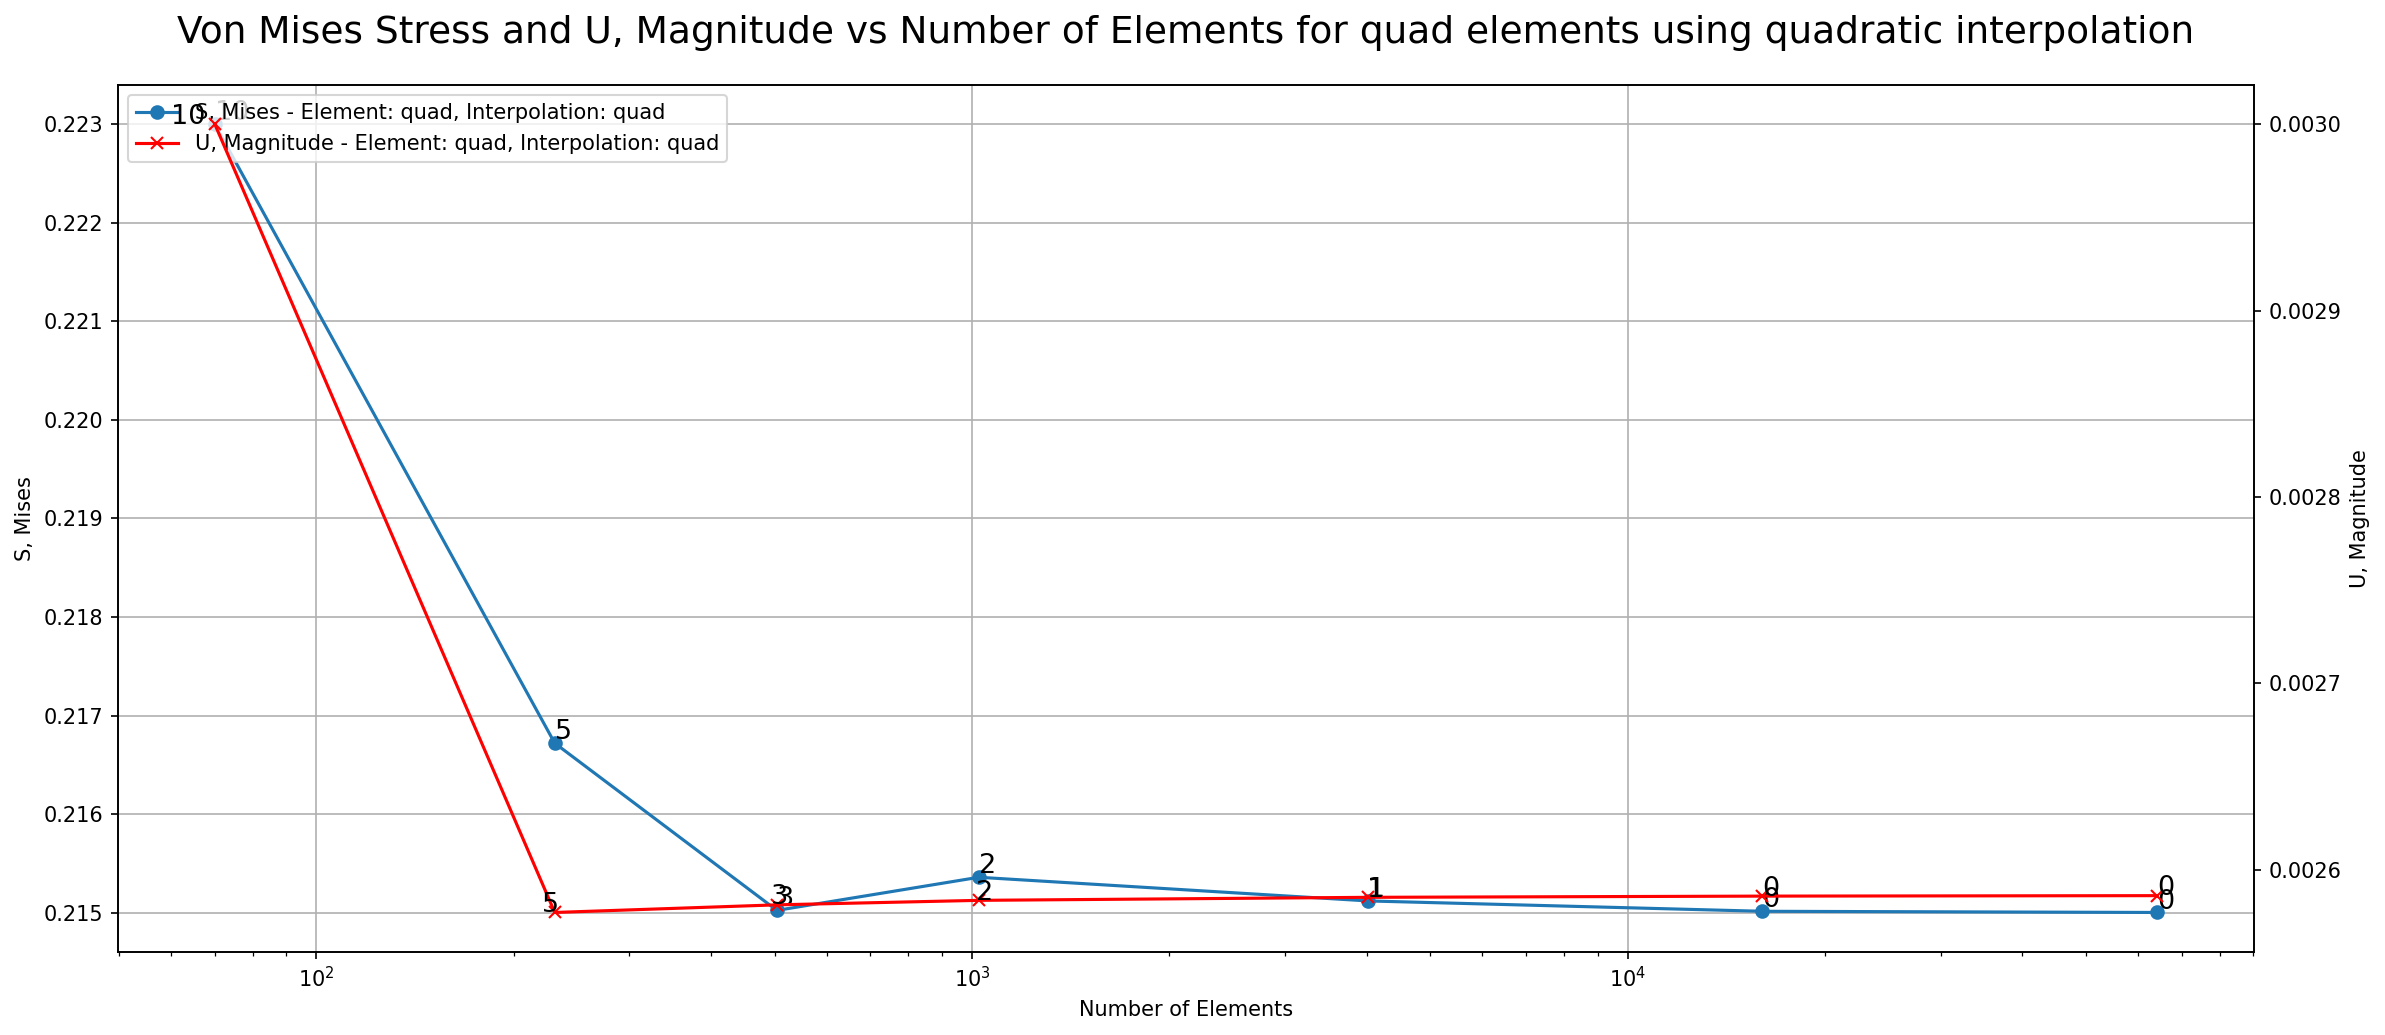

In [75]:
fig, ax1 = plt.subplots(figsize=(16, 7), dpi=150)

element = 'quad'
interpolation = 'quad'

# Plot for 'S, Mises' on the left y-axis
measurement = 'S, Mises'
conditions = {
    'Measurement Type': f'== "{measurement}"',
    'Element Type': f'== "{element}"',
    'Interpolation Type': f'== "{interpolation}"',
    'Node ID': '== "A"'
}
x_var = 'Number of Elements'
plot_data = slice_df(df, conditions)
ax1.plot(plot_data[x_var], plot_data['Values'], marker='o', label=f'{measurement} - Element: {element}, Interpolation: {interpolation}')
for k, v in plot_data.iterrows():
    ax1.text(v[x_var], v['Values']+0.00004, f"{int(v['Element Size'])}", fontsize=13)
ax1.set_xscale('log')
ax1.set_xlabel(x_var)
ax1.set_ylabel('S, Mises')
ax1.grid(True)

# Create a second y-axis for 'U, Magnitude'
ax2 = ax1.twinx()
measurement = 'U, Magnitude'
conditions = {
    'Measurement Type': f'== "{measurement}"',
    'Element Type': f'== "{element}"',
    'Interpolation Type': f'== "{interpolation}"',
    'Node ID': '== "A"'
}
plot_data = slice_df(df, conditions)
ax2.plot(plot_data[x_var], plot_data['Values'], marker='x', color='r', label=f'{measurement} - Element: {element}, Interpolation: {interpolation}')
for k, v in plot_data.iterrows():
    ax2.text(v[x_var]-10, v['Values']+0.0000002, f"{int(v['Element Size'])}", fontsize=13, color='black')
ax2.set_ylabel('U, Magnitude')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Von Mises Stress and U, Magnitude vs Number of Elements for quad elements using quadratic interpolation', fontsize=18, pad=20)
plt.tight_layout()
plt.show()